# Random Forest Model Implemented to analysis the Relationship among the data Catergorically

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from load_data import load_categorical_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
from scipy import stats
import time
import seaborn as sns

In [2]:
import openpyxl 
import os

In [3]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_true)-MinMaxNormal(y_pred))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [5]:
"""
Use Decision Tree to fit the relationship between 
homeless_real_value and other variables, except 
no_longer_homeless, prevention_duty, and relief duty.
"""

#Read data
categorical_data,local_authority_names,total_duty_owed,total_population_in_households,prevention_duty_owed,relief_duty_owed,support_need_homeless,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2020,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,median_prices,median_earning_gross,categorical_median_afforability_ratio,lower_quatile_prices,lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

#social_housing_start,intermediate_start,total_affordable_start,affordable_complete,social_complete,intermediate_complete,total_affordable_complete=load_categorical_more_data()

In [6]:
categorical_data.columns

Index(['Local', 'Local_Authority_code', 'Local_Authority_name',
       'Total_owed_a_prevention_or_relief_duty',
       'Threatened_with_homelessness_within_56_days_Prevention_duty_owed',
       'Homeless_Relief_duty_owed4', 'Number_of_households_in_area4(000s)',
       'Total_households_with_support_needs', 'Total_secured_accommodation',
       'Homeless_(including_intentionally_homeless)',
       'Size_of_social_housing_waiting_list_2020', '2020_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Total_Affordable(Starts_on_Site)', 'Affordable_Rent(Completions)',
       'Social_Rent(Completions)', 'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Total(Starts_on_Site)',
       'Total(Completions)', 'Market(Starts_on_Site)', 'Market(Completions)',
       'A_B_property_cou

In [10]:
categorical_data

,Local,Local_Authority_code,Local_Authority_name,Total_owed_a_prevention_or_relief_duty,Threatened_with_homelessness_within_56_days_Prevention_duty_owed,Homeless_Relief_duty_owed4,Number_of_households_in_area4(000s),Total_households_with_support_needs,Total_secured_accommodation,Homeless_(including_intentionally_homeless),...,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,median_houses_2020,median_earning_2020,ratio_by_medians_2020,lower_quatile_houses_2020,lower_quatile_earning_2020,ratio_by_lower_quatile_2020
1,0,E06000002,Middlesbrough,986,504,482,57.078,552,278,25,...,44130,16370,3490,590,134000,25849,5.18,84995,20670,4.11
2,1,E06000003,Redcar Cleveland,522,237,285,62.919,274,138,7,...,40330,20130,4420,430,132500,26912,4.92,94995,20424,4.65
3,2,E06000004,Stockton-on-Tees,2199,1446,753,82.989,2018,1044,25,...,52290,26150,8740,1530,148000,29495,5.02,106400,21755,4.89
4,3,E06000005,Darlington,711,252,459,48.31,533,139,18,...,33820,13020,4520,650,144950,27087,5.35,99950,19383,5.16
5,4,E06000007,Warrington,1796,1053,743,91.296,1389,459,87,...,47670,31330,12100,2880,195000,29986,6.5,137000,20503,6.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,248,E09000014,Haringey,2383,1486,897,108.13,976,981,160,...,27470,61400,16500,5430,518750,35590,14.58,400000,26179,15.28
250,249,E09000021,Kingston upon Thames,427,210,217,68.666,189,109,66,...,4090,35900,23340,5250,492000,41264,11.92,377000,30795,12.24
251,250,E09000024,Merton,551,396,155,79.123,187,351,38,...,9660,51510,18900,5860,485000,42049,11.53,382000,27970,13.66
252,251,E09000030,Tower Hamlets,1938,760,1178,133.819,913,382,102,...,29400,69390,35900,5520,508250,41939,12.12,400000,30143,13.27


In [11]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
#data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
data_table=data_table.drop(labels='Total_secured_accommodation',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
#data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [34]:
data_table.columns


Index(['Total_owed_a_prevention_or_relief_duty',
       'Number_of_households_in_area4(000s)',
       'Homeless_(including_intentionally_homeless)',
       'Size_of_social_housing_waiting_list_2020', '2020_Total_Lettings',
       'Affordable_Rent(Starts_on_Site)', 'Social_Rent_(Starts_on_Site)',
       'Intermediate_Rent_(Starts_on_Site)',
       'Affordable_Home_Ownership(Starts_on_Site)',
       'Total_Affordable(Starts_on_Site)', 'Affordable_Rent(Completions)',
       'Social_Rent(Completions)', 'Intermediate_Rent(Completions)',
       'Affordable_Home_Ownership(Completions)',
       'Total_Affordable(Completions)', 'Total(Starts_on_Site)',
       'Total(Completions)', 'Market(Starts_on_Site)', 'Market(Completions)',
       'A_B_property_counts', 'C_D_property_counts', 'E_F_property_counts',
       'G_H_property_counts', 'median_houses_2020', 'median_earning_2020',
       'ratio_by_medians_2020', 'lower_quatile_houses_2020',
       'lower_quatile_earning_2020', 'ratio_by_lower_quati

In [37]:
stats.skew(data_table['lower_quatile_houses_2020'])

0.6814886895093419

In [20]:
len(data_table.columns)
data_table.columns[0]

'Total_owed_a_prevention_or_relief_duty'

In [28]:
overall_skew = []
for i in range(0,len(data_table.columns)):
    name = data_table.columns[i]
    sk = stats.skew(data_table[name])
    overall_skew.append(sk)

average_skew = (sum(overall_skew))/len(overall_skew)
print(average_skew)

2.7079495583726847


In [29]:
np.median(overall_skew)

2.352896702120421

In [8]:
feature_space = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [9]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 10)

# Cleaning test sets to avoid future warning messages
normal_class_set = class_set
class_set = normal_class_set.values.ravel() 
normal_test_class_set = test_class_set
test_class_set = normal_test_class_set.values.ravel() 

In [10]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [11]:
# Set best parameters given by grid search 
fit_rf = fit_rf.set_params(bootstrap = True,n_estimators = 400,criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 5)

In [12]:
hundredYard_forest = fit_rf.fit(training_set, class_set)

In [13]:
predictions = hundredYard_forest.predict(test_set)

In [14]:
feature_importance_score = list(hundredYard_forest.feature_importances_)

In [15]:
print('SL Model R2 Score: '+str(r2_score(test_class_set,predictions)))

coef = np.corrcoef(test_class_set,predictions)
coef = coef[0,1]
print('SL Model Correlation Coefficient: '+str(coef))

SLMSPE = mean_absolute_percentage_error(test_class_set,predictions)
print('SL Mean Squared Percentage Error: '+str(SLMSPE))

SL Model R2 Score: 0.7310354573385521
SL Model Correlation Coefficient: 0.8829725841711706
SL Mean Squared Percentage Error: 5.164578483530898


In [16]:
socre_data_score = pd.DataFrame(feature_importance_score)
socre_data_score.index = hundredYard_forest.feature_names_in_[:]
socre_data_score = socre_data_score.sort_values(by=[0])

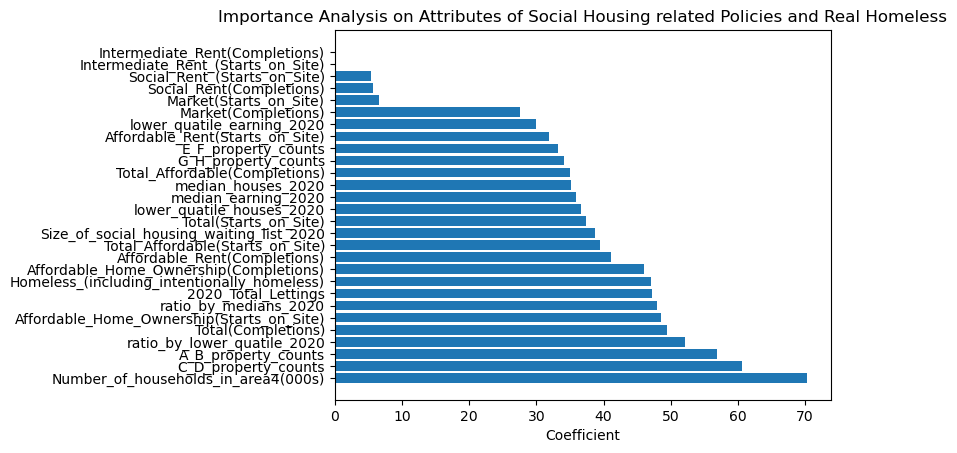

In [17]:

plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score*1000, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/random_forest_importance_score_analysis.png')
plt.show()

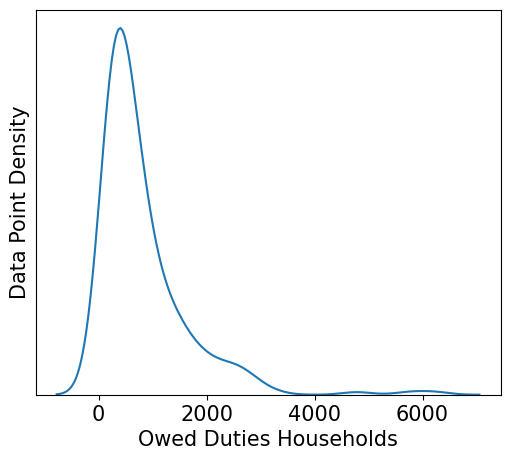

In [21]:
plt.rcParams.update({'font.size': 15})
fig_box, ax_skew = plt.subplots(figsize=(6,5))
sns.kdeplot(data=feature_class,x="Total_owed_a_prevention_or_relief_duty")
ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.xlabel('Owed Duties Households')
plt.ylabel('Data Point Density')
plt.savefig('Figure/total_duty_owed_skewness.png',bbox_inches='tight')

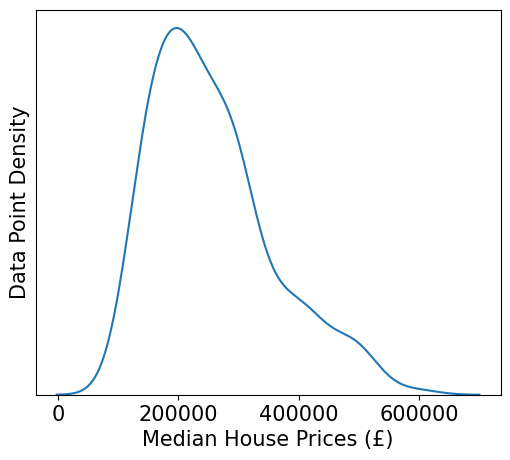

In [22]:
plt.rcParams.update({'font.size': 15})
fig_box, ax_skew = plt.subplots(figsize=(6,5))
sns.kdeplot(data=feature_space,x="median_houses_2020")
ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.ylabel('Data Point Density')
plt.xlabel('Median House Prices (£)')
plt.savefig('Figure/skewness_of_house_prices_medians_across_england.png',bbox_inches='tight')

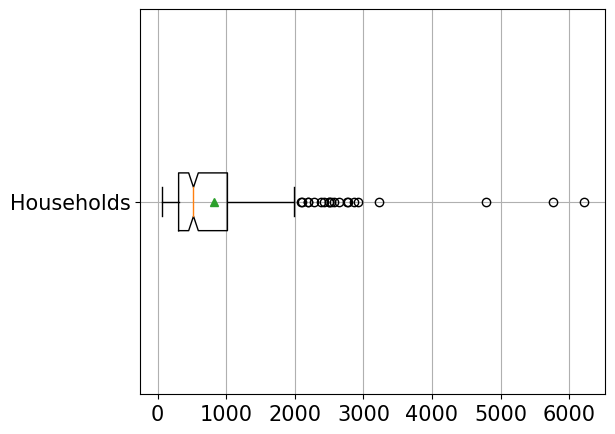

In [25]:
plt.rcParams.update({'font.size': 15})
fig_box, ax_box = plt.subplots(figsize=(6,5))
ax_box.grid(zorder=0)
#ax_box.set_title('Box Plot of Households holding Relief or Prevention duty across England')
ax_box.boxplot(data_table['Total_owed_a_prevention_or_relief_duty'],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Households'])
plt.savefig('Figure/total_owed_a_prevention_or_relief_duty.png',bbox_inches='tight')

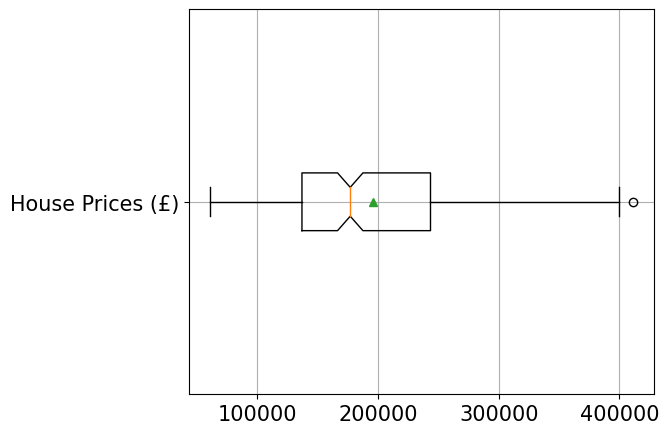

In [26]:
plt.rcParams.update({'font.size': 15})
fig_box, ax_box = plt.subplots(figsize=(6,5))
ax_box.grid(zorder=0)
#ax_box.set_title('Box Plot of Recorded Lower Quatile House Prices of the Houses across England')
ax_box.boxplot(data_table['lower_quatile_houses_2020'],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['House Prices (£)'])
plt.savefig('Figure/lq_house_prices_data.png',bbox_inches='tight')

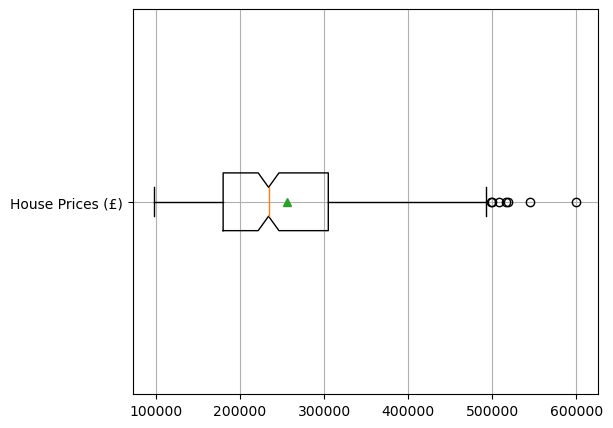

In [117]:
fig_box, ax_box = plt.subplots(figsize=(6,5))
ax_box.grid(zorder=0)
#ax_box.set_title('Box Plot of Recorded Median House Prices of the Houses')
ax_box.boxplot(data_table['median_houses_2020'],showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['House Prices (£)'])
plt.savefig('Figure/median_house_prices_data.png',bbox_inches='tight')

In [27]:
feature_importance = pd.DataFrame(feature_importance_score)
feature_importance.columns = ['RF Importance']
feature_importance.index = list(hundredYard_forest.feature_names_in_[:])
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_example_randome_forest_model_scores.csv"))  

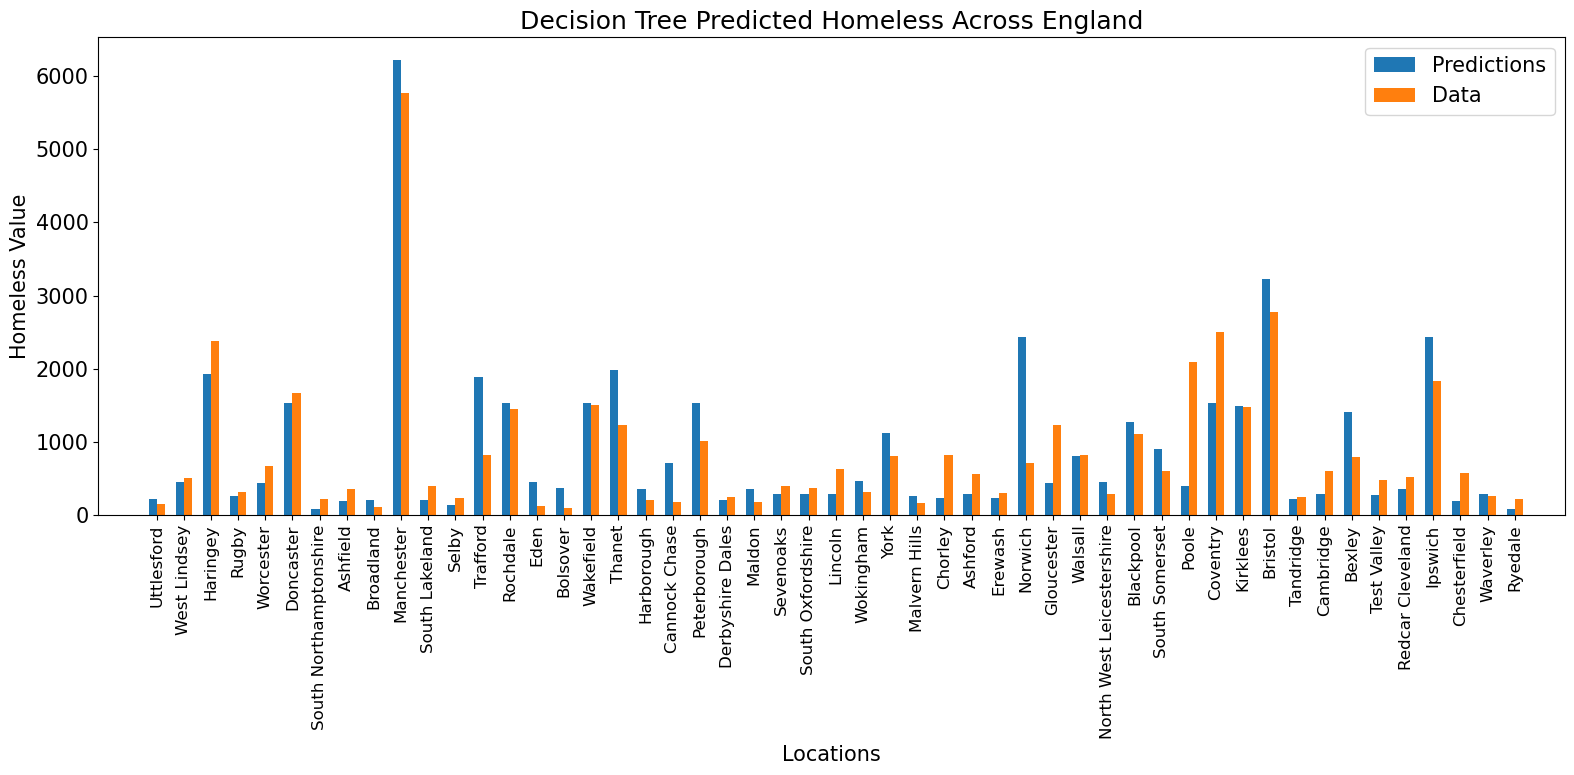

In [21]:
#Plot and save the test results
f_predictions = predictions
test_y = test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/ERIC_Random_forest_test_result.png')
plt.show()

In [28]:
accuracy_list = []
importance = pd.DataFrame(training_set.columns, columns=["feature"])
features = pd.DataFrame(training_set.columns, columns=["feature"])
loop_fit_rf = RandomForestClassifier(random_state=0)
for i in range(0,20):
    local_training_set, local_test_set, local_class_set, local_test_class_set = train_test_split(feature_space,feature_class,test_size = 0.20,random_state = i)
    # Cleaning test sets to avoid future warning messages
    local_normal_class_set = local_class_set
    local_class_set = local_normal_class_set.values.ravel() 
    local_normal_test_class_set = local_test_class_set
    local_test_class_set = local_normal_test_class_set.values.ravel() 
    
    loop_fit_rf = loop_fit_rf.set_params(n_estimators = 400,criterion = 'entropy',max_features = 'auto',max_depth = 5)
    
    loop_fit_rf.fit(local_training_set, local_class_set)
    local_predictions = loop_fit_rf.predict(local_test_set)
    
    accuracy = r2_score(local_test_class_set,local_predictions)
    accuracy_list.append(accuracy)

    importances_values = loop_fit_rf.feature_importances_
    
    columns_name = "importance" + str(i)
    importances = pd.DataFrame(importances_values, columns=[columns_name])
    importance = pd.concat([importance, importances], axis=1)


    importance = importance.sort_values([columns_name], ascending=True)
    importance[columns_name] = (importance[columns_name]).astype(float)
    importance = importance.sort_values([columns_name])
    
    thisImportance =  pd.concat([features, importances], axis=1)
    
    thisImportance = thisImportance.sort_values([columns_name], ascending=True)
    thisImportance[columns_name] = (thisImportance[columns_name]).astype(float)
    thisImportance = thisImportance.sort_values([columns_name])

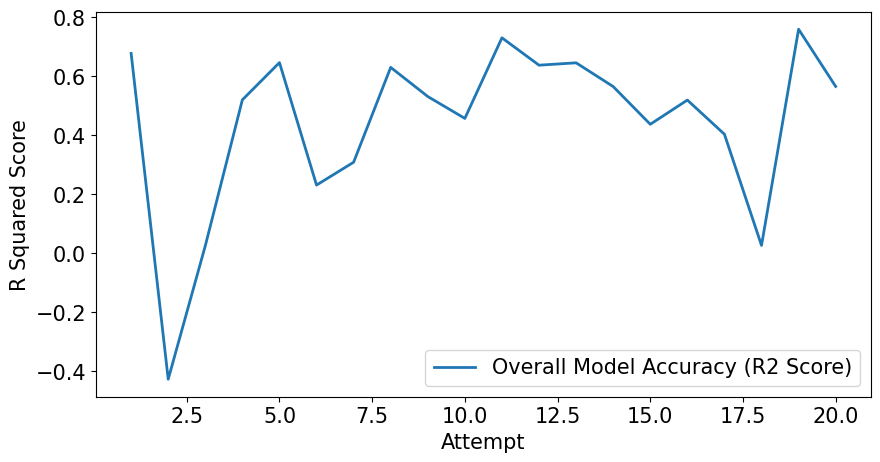

In [29]:
numbering = list(range(1,len(accuracy_list)+1))
plt.rcParams.update({'font.size': 15})
fig3, ax = plt.subplots(figsize=(10,5))
plt.plot(numbering, accuracy_list,linestyle ="-",linewidth=2, label = "Overall Model Accuracy (R2 Score)")
plt.xlabel('Attempt')
plt.ylabel('R Squared Score')
plt.legend(loc=4, prop={'size': 15})
plt.savefig('ERIC_accuracy_random_forest.png',bbox_inches='tight')

In [30]:
accuracy_list=np.array(accuracy_list)
np.median(accuracy_list)

0.5264258924109956

In [31]:
importance.index = importance['feature']
importance = importance.drop(labels='feature',axis=1)
average_importance = importance.mean(axis=1)

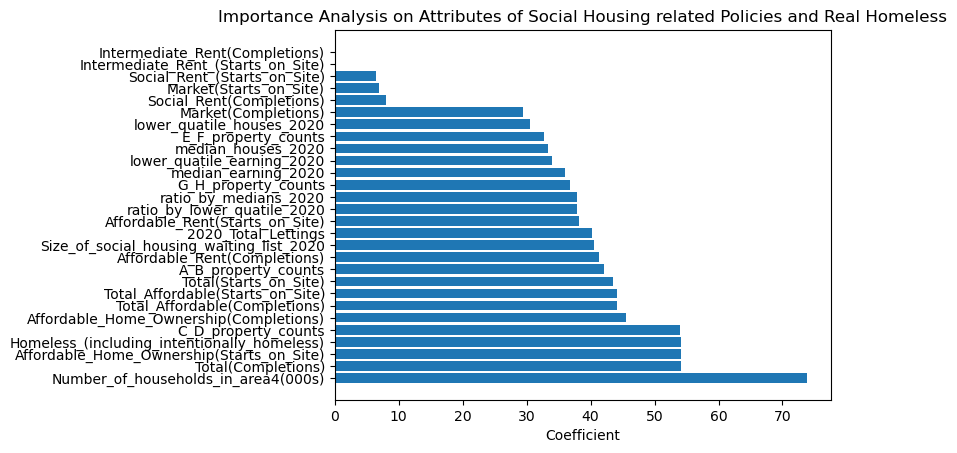

In [32]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/ERIC_overall_random_forest_importance_score_analysis.png',bbox_inches='tight')
plt.show()

In [33]:
feature_importance = pd.DataFrame(average_importance*1000)
feature_importance.columns = ['RF Importance']
feature_importance.index = average_importance.index
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_overall_randome_forest_model_scores.csv"))  

In [43]:
data_table=categorical_data.drop(labels='Local',axis=1)
data_table=data_table.drop(labels='Local_Authority_code',axis=1)
data_table=data_table.drop(labels='Local_Authority_name',axis=1)
data_table=data_table.drop(labels='Homeless_(including_intentionally_homeless)',axis=1)
data_table=data_table.drop(labels='Threatened_with_homelessness_within_56_days_Prevention_duty_owed',axis=1)
data_table=data_table.drop(labels='Homeless_Relief_duty_owed4',axis=1)
data_table=data_table.drop(labels='Total_households_with_support_needs',axis=1)
data_table=data_table.drop(labels='Total_secured_accommodation',axis=1)
data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Social_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='Social_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent_(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Intermediate_Rent(Completions)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Affordable_Home_Ownership(Completions)',axis=1)
#data_table=data_table.drop(labels='Market(Starts_on_Site)',axis=1)
#data_table=data_table.drop(labels='Market(Completions)',axis=1)
#data_table=data_table.drop(labels='C_D_property_counts',axis=1)
#data_table=data_table.drop(labels='E_F_property_counts',axis=1)
#data_table=data_table.drop(labels='G_H_property_counts',axis=1)
#data_table=data_table.drop(labels='median_houses_2020',axis=1)
#data_table=data_table.drop(labels='median_earning_2020',axis=1)
#data_table=data_table.drop(labels='ratio_by_medians_2020',axis=1)
data_table=data_table.drop(labels='Total_Affordable(Starts_on_Site)',axis=1)
data_table=data_table.drop(labels='Total_Affordable(Completions)',axis=1)
data_table=data_table.drop(labels='Total(Starts_on_Site)',axis=1)
data_table=data_table.drop(labels='Total(Completions)',axis=1)
#data_table=data_table.drop(labels='lower_quatile_houses_2020',axis=1)
#data_table=data_table.drop(labels='lower_quatile_earning_2020',axis=1)

In [44]:
len(data_table.columns)

22

In [45]:
feature_space = 0
feature_class = 0
feature_space = data_table.iloc[:, data_table.columns != 'Total_owed_a_prevention_or_relief_duty'].astype('float')
feature_class = data_table.iloc[:, data_table.columns == 'Total_owed_a_prevention_or_relief_duty'].astype('int')

In [46]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [61]:
# Run Exhaustive Search for optimal parameters
np.random.seed(0)
start = time.time()

param_dist = {'n_estimators':[400,500,600],'max_depth': [2,3,5],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 3,
                     param_grid=param_dist, 
                     n_jobs = 5)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 400}
Time taken in grid search:  38.31


In [47]:
accuracy_list = []
importance_new = pd.DataFrame(feature_space.columns, columns=["feature"])
features_new = pd.DataFrame(feature_class.columns, columns=["feature"])
loop_fit_rf_new = RandomForestClassifier(random_state=0)

In [48]:
for i in range(5,20):
    local_training_set, local_test_set, local_class_set, local_test_class_set = train_test_split(feature_space,feature_class,test_size = 0.20,random_state = i)
    # Cleaning test sets to avoid future warning messages
    local_normal_class_set = local_class_set
    local_class_set = local_normal_class_set.values.ravel() 
    local_normal_test_class_set = local_test_class_set
    local_test_class_set = local_normal_test_class_set.values.ravel() 
    
    loop_fit_rf = loop_fit_rf.set_params(n_estimators = 400,criterion = 'entropy',max_features = None,max_depth = 5)
    
    loop_fit_rf.fit(local_training_set, local_class_set)
    local_predictions = loop_fit_rf.predict(local_test_set)
    
    accuracy = r2_score(local_test_class_set,local_predictions)
    accuracy_list.append(accuracy)

    importances_values = loop_fit_rf.feature_importances_
    
    columns_name = "importance" + str(i)
    importances_new = pd.DataFrame(importances_values, columns=[columns_name])
    importance_new = pd.concat([importance_new, importances_new], axis=1)


    importance_new = importance_new.sort_values([columns_name], ascending=True)
    importance_new[columns_name] = (importance_new[columns_name]).astype(float)
    importance_new = importance_new.sort_values([columns_name])

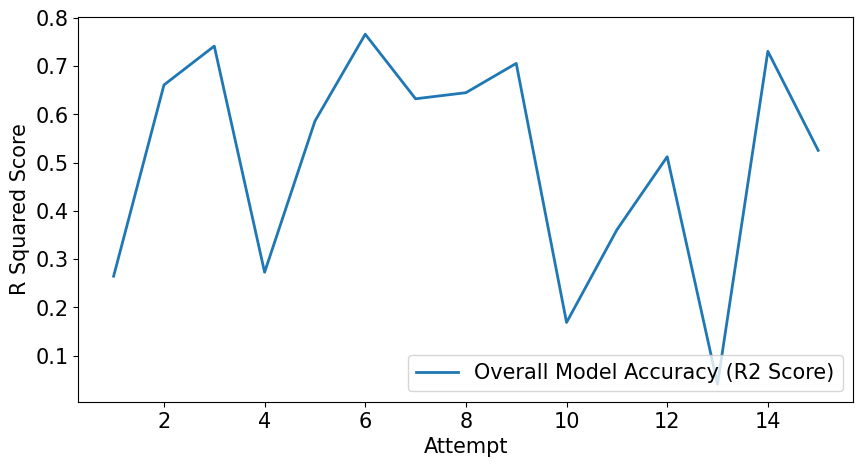

In [49]:
numbering = list(range(1,len(accuracy_list)+1))
plt.rcParams.update({'font.size': 15})
fig3, ax = plt.subplots(figsize=(10,5))
plt.plot(numbering, accuracy_list,linestyle ="-",linewidth=2, label = "Overall Model Accuracy (R2 Score)")
plt.xlabel('Attempt')
plt.ylabel('R Squared Score')
plt.legend(loc=4, prop={'size': 15})
plt.savefig('ERIC_accuracy_random_forest_new.png',bbox_inches='tight')

In [50]:
accuracy_list=np.array(accuracy_list)
np.max(accuracy_list)

0.7661005731651336

In [95]:
importance_new

,importance5,importance6,importance7,importance8,importance9,importance10,importance11,importance12,importance13,importance14,importance15,importance16,importance17,importance18,importance19
feature,,,,,,,,,,,,,,,
Social_Rent(Completions),0.010557,0.007918,0.007847,0.010975,0.011507,0.006816,0.010537,0.009733,0.010148,0.008163,0.009761,0.010358,0.008211,0.008671,0.006318
Market(Starts_on_Site),0.008936,0.006167,0.011397,0.007848,0.007300,0.008762,0.008163,0.007989,0.007857,0.008193,0.009719,0.011289,0.008452,0.006742,0.008150
Social_Rent_(Starts_on_Site),0.009586,0.007013,0.008679,0.007516,0.008318,0.007960,0.008215,0.008137,0.010788,0.007533,0.008866,0.009714,0.009271,0.009032,0.009218
median_houses_2020,0.032595,0.029072,0.026981,0.028372,0.030644,0.030883,0.024870,0.022656,0.032941,0.029095,0.029873,0.025402,0.033550,0.034636,0.029639
E_F_property_counts,0.043774,0.035566,0.033449,0.038880,0.038734,0.035274,0.038126,0.033637,0.036488,0.040879,0.037397,0.030910,0.035318,0.036240,0.030813
lower_quatile_houses_2020,0.026170,0.033545,0.030953,0.026705,0.027774,0.036724,0.025193,0.028171,0.040116,0.031085,0.029089,0.024638,0.042142,0.027240,0.030998
ratio_by_medians_2020,0.040293,0.042194,0.050222,0.042086,0.038058,0.055987,0.035072,0.037055,0.040941,0.040654,0.053369,0.034504,0.041878,0.046448,0.032088
ratio_by_lower_quatile_2020,0.033089,0.036608,0.042490,0.031030,0.039039,0.059231,0.033804,0.035465,0.039545,0.030355,0.042223,0.030723,0.041897,0.042613,0.032673
G_H_property_counts,0.041820,0.046958,0.035388,0.031100,0.036963,0.034548,0.044630,0.032878,0.034687,0.040839,0.040849,0.035813,0.030751,0.036165,0.034828


In [ ]:
importance_new.index = importance_new['feature']
importance_new = importance_new.drop(labels='feature',axis=1)
average_importance = importance_new.mean(axis=1)

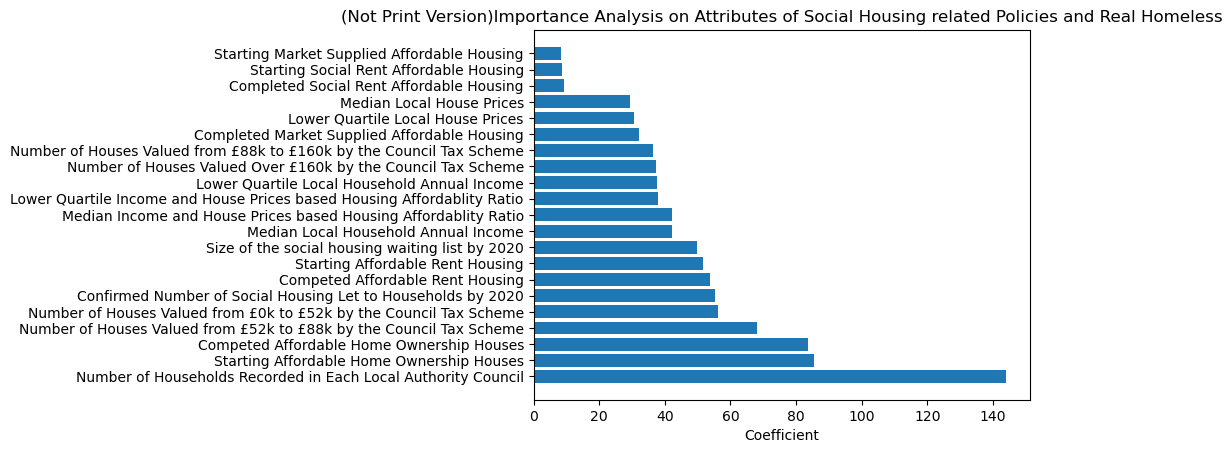

In [75]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
plt.rcdefaults()
fig, ax = plt.subplots()

feature_importance_score = np.array(socre_data_score[0])

# Example data
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('(Not Print Version)Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.show()

In [84]:
average_importance.index = ['Social Rent Affordable (Completed)',
                            'Market Supplied Affordable (Started)',
       'Social Rent Affordable (Started)', 'Median House Prices',
       'Properties of value \xA388k-\xA3160k', 'Lower Quartile House Prices',
       'Affordablity Ratio Medians', 'Housing Affordablity Ratio Lower Quartile',
       'Properties of value \xA3160k+', 'Market Supplied Affordable (Completed)',
       'Lower Quartile Household Income', 'Affordable Rent Housing (Started)',
       'Properties of value \xA30k-\xA352k', 'Median Household Income',
       'Affordable Rent Housing (Completed)',
       'Social Housing Waiting List', 'Social Housing Lettings',
       'Properties of value \xA352k-\xA388k', '"Ownership" Houses (Started)',
       '"Ownership" Houses (Completed)',
       'Number of Households in Local Area']

In [85]:
socre_data_score = pd.DataFrame(average_importance*1000)
socre_data_score.index = average_importance.index
socre_data_score = socre_data_score.sort_values(by=[0])
socre_data_score

,0
Market Supplied Affordable (Started),8.464156
Social Rent Affordable (Started),8.656287
Social Rent Affordable (Completed),9.168016
Median House Prices,29.413930
Lower Quartile House Prices,30.702925
Market Supplied Affordable (Completed),32.021592
Properties of value £88k-£160k,36.365666
Properties of value £160k+,37.214461
Lower Quartile Household Income,37.671017
Housing Affordablity Ratio Lower Quartile,38.052490


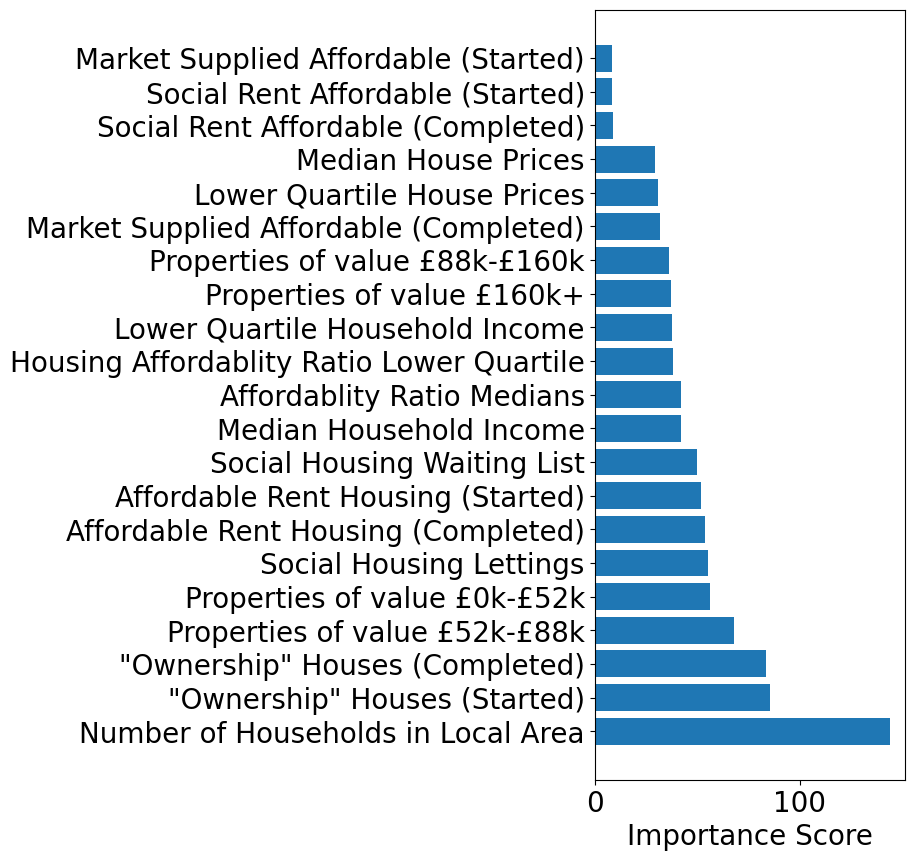

In [104]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(4,10))

feature_importance_score = np.array(socre_data_score[0])
x_names = list(socre_data_score.index[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Importance Score')
#ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/ERIC_new_overall_random_forest_importance_score_analysis.png',bbox_inches='tight')
plt.show()

In [71]:
feature_importance = socre_data_score
feature_importance.columns = ['RF Importance']
feature_importance.index = average_importance.index
cwd = os.getcwd()
feature_importance.to_csv(os.path.join(cwd, "ResultTables/ERIC_new_overall_randome_forest_model_scores.csv"))  

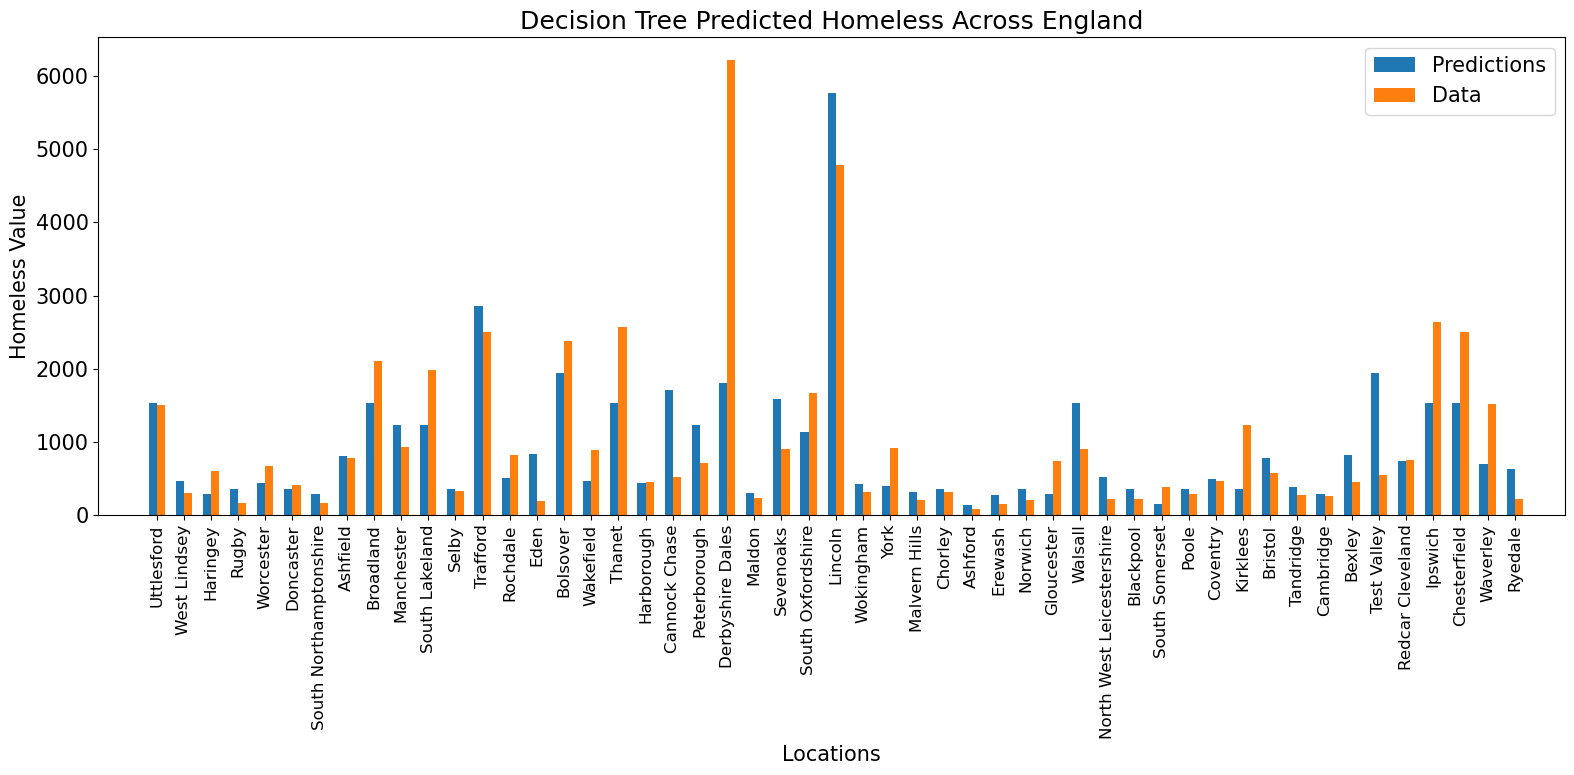

In [91]:
#Plot and save the test results
f_predictions = local_predictions
test_y = local_test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/ERIC_new_Random_forest_test_result.png')
plt.show()